## Import Modules

In [53]:
import pandas as pd
pd.set_option('display.max_colwidth', -1)
from models.transform import transform_pr
import seaborn as sns
sns.set()
import matplotlib.pyplot as plt
%matplotlib inline
from wordcloud import WordCloud
import ipywidgets as widgets
from IPython.display import display
from IPython.html.widgets import interactive
from IPython.display import HTML

In [54]:
HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')


## create dataframe for pull requests

In [5]:
pr= transform_pr()

## View first two rows

In [56]:
pr.head(2)

,repo,requested_reviewers,assignee,author_association,created_at,state,number,issue_url,user_,node_id,url,id
0,k8-data-visualization,DinisCruz,lucia15,COLLABORATOR,2020-09-28T21:21:35Z,open,101,https://api.github.com/repos/k8-proxy/k8-data-visualization/issues/101,lucia15,MDExOlB1bGxSZXF1ZXN0NDk0NDA4OTkx,https://api.github.com/repos/k8-proxy/k8-data-visualization/pulls/101,494408991
1,k8-data-visualization,DinisCruz,baker371,COLLABORATOR,2020-09-28T20:46:11Z,open,100,https://api.github.com/repos/k8-proxy/k8-data-visualization/issues/100,baker371,MDExOlB1bGxSZXF1ZXN0NDk0MzkyMzM1,https://api.github.com/repos/k8-proxy/k8-data-visualization/pulls/100,494392335


## Choose what to display per row

In [ ]:
# choose what to be displayed
df = pr.copy()
df = df[['repo', 'requested_reviewers', 'assignee', 'created_at', 'state', 'user_', 'url']]

## View Pull Requests per Repo

In [ ]:
# pull requests per repo
items = ['All']+sorted(df['repo'].unique().tolist())
def view(Repo=''):
    if Repo=="All": display(df)
    display(df[df.repo==Repo].reset_index(drop=True))
w = widgets.Select(options=items)
interactive(view, Repo=w)

## View Pull Requests per User

In [26]:
# choose what to be displayed
df = pr.copy()
df = df[['repo', 'requested_reviewers', 'assignee', 'created_at', 'state', 'user_', 'url']]

## View Pull Requests per Repo

In [55]:
# pull requests per repo
items = ['All']+sorted(df['repo'].unique().tolist())
def view(Repo=''):
    if Repo=="All": display(df)
    display(df[df.repo==Repo].reset_index(drop=True))
w = widgets.Select(options=items)
interactive(view, Repo=w)

interactive(children=(Select(description='Repo', options=('All', 'k8-data-visualization', 'k8-reverse-proxy', …

## View Pull Requests per User

In [44]:
items = ['All']+sorted(df['user_'].unique().tolist())
def view(User=''):
    if User=="All": display(df)
    display(df[df.user_==User].reset_index(drop=True))
w = widgets.Select(options=items)
interactive(view, User=w)

interactive(children=(Select(description='User', options=('All', 'GINAGC', 'IslamHeggy', 'NourEddineX', 'azopa…

## View Pull Requests per Requested Reviewer

In [43]:
items = ['All']+df['requested_reviewers'].unique().tolist()
items = [x for x in items if x is not None]
def view(Reviewer=''):
    if Reviewer=="All": display(df)
    display(df[df.requested_reviewers==Reviewer].reset_index(drop=True))
w = widgets.Select(options=items)
interactive(view, Reviewer=w)

interactive(children=(Select(description='Reviewer', options=('All', 'DinisCruz', 'werzl'), value='All'), Outp…

## Word Cloud for Repos

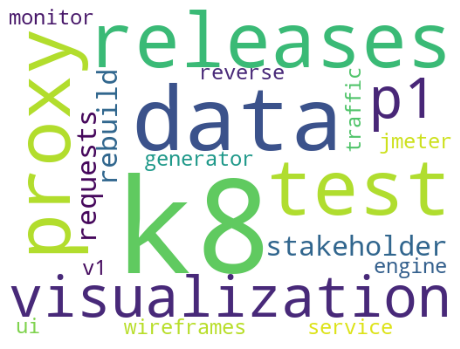

In [47]:
x2011 = pr.repo
plt.subplots(figsize=(8,8))
wordcloud = WordCloud(background_color='white',
                      width=512,
                      height=384).generate(" ".join(x2011))
plt.imshow(wordcloud)
plt.axis('off')
plt.savefig('repos.png')
plt.show()

## Word Cloud for Users

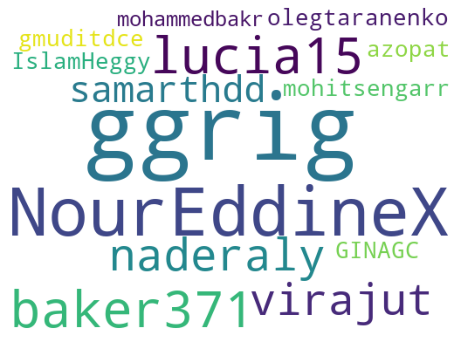

In [48]:
x2011 = pr.user_
plt.subplots(figsize=(8,8))
wordcloud = WordCloud(background_color='white',
                      width=512,
                      height=384).generate(" ".join(x2011))
plt.imshow(wordcloud)
plt.axis('off')
plt.savefig('users.png')
plt.show()